In [80]:
%pylab inline
rcParams['savefig.dpi'] = 150

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [16]:
import seaborn as sns
import pandas as pd
sns.set_style('white', {'axes.edgecolor':'0.5',
                        'axes.linewidth':'0.5'})

Importing the data into pandas

In [3]:
chapter_df = pd.DataFrame.from_csv("chapters_with_ratings.csv")
character_df = pd.DataFrame.from_csv("characters.csv", parse_dates=False)
event_df = pd.DataFrame.from_csv("events.csv")

AGOT = chapter_df[chapter_df.bookID == 0]
ACOK = chapter_df[chapter_df.bookID == 1]
ASOS = chapter_df[chapter_df.bookID == 2]
AFFC = chapter_df[chapter_df.bookID == 3]
ADWD = chapter_df[chapter_df.bookID == 4]
books = [AGOT, ACOK, ASOS, AFFC, ADWD]

# Chapter ratings - all books together

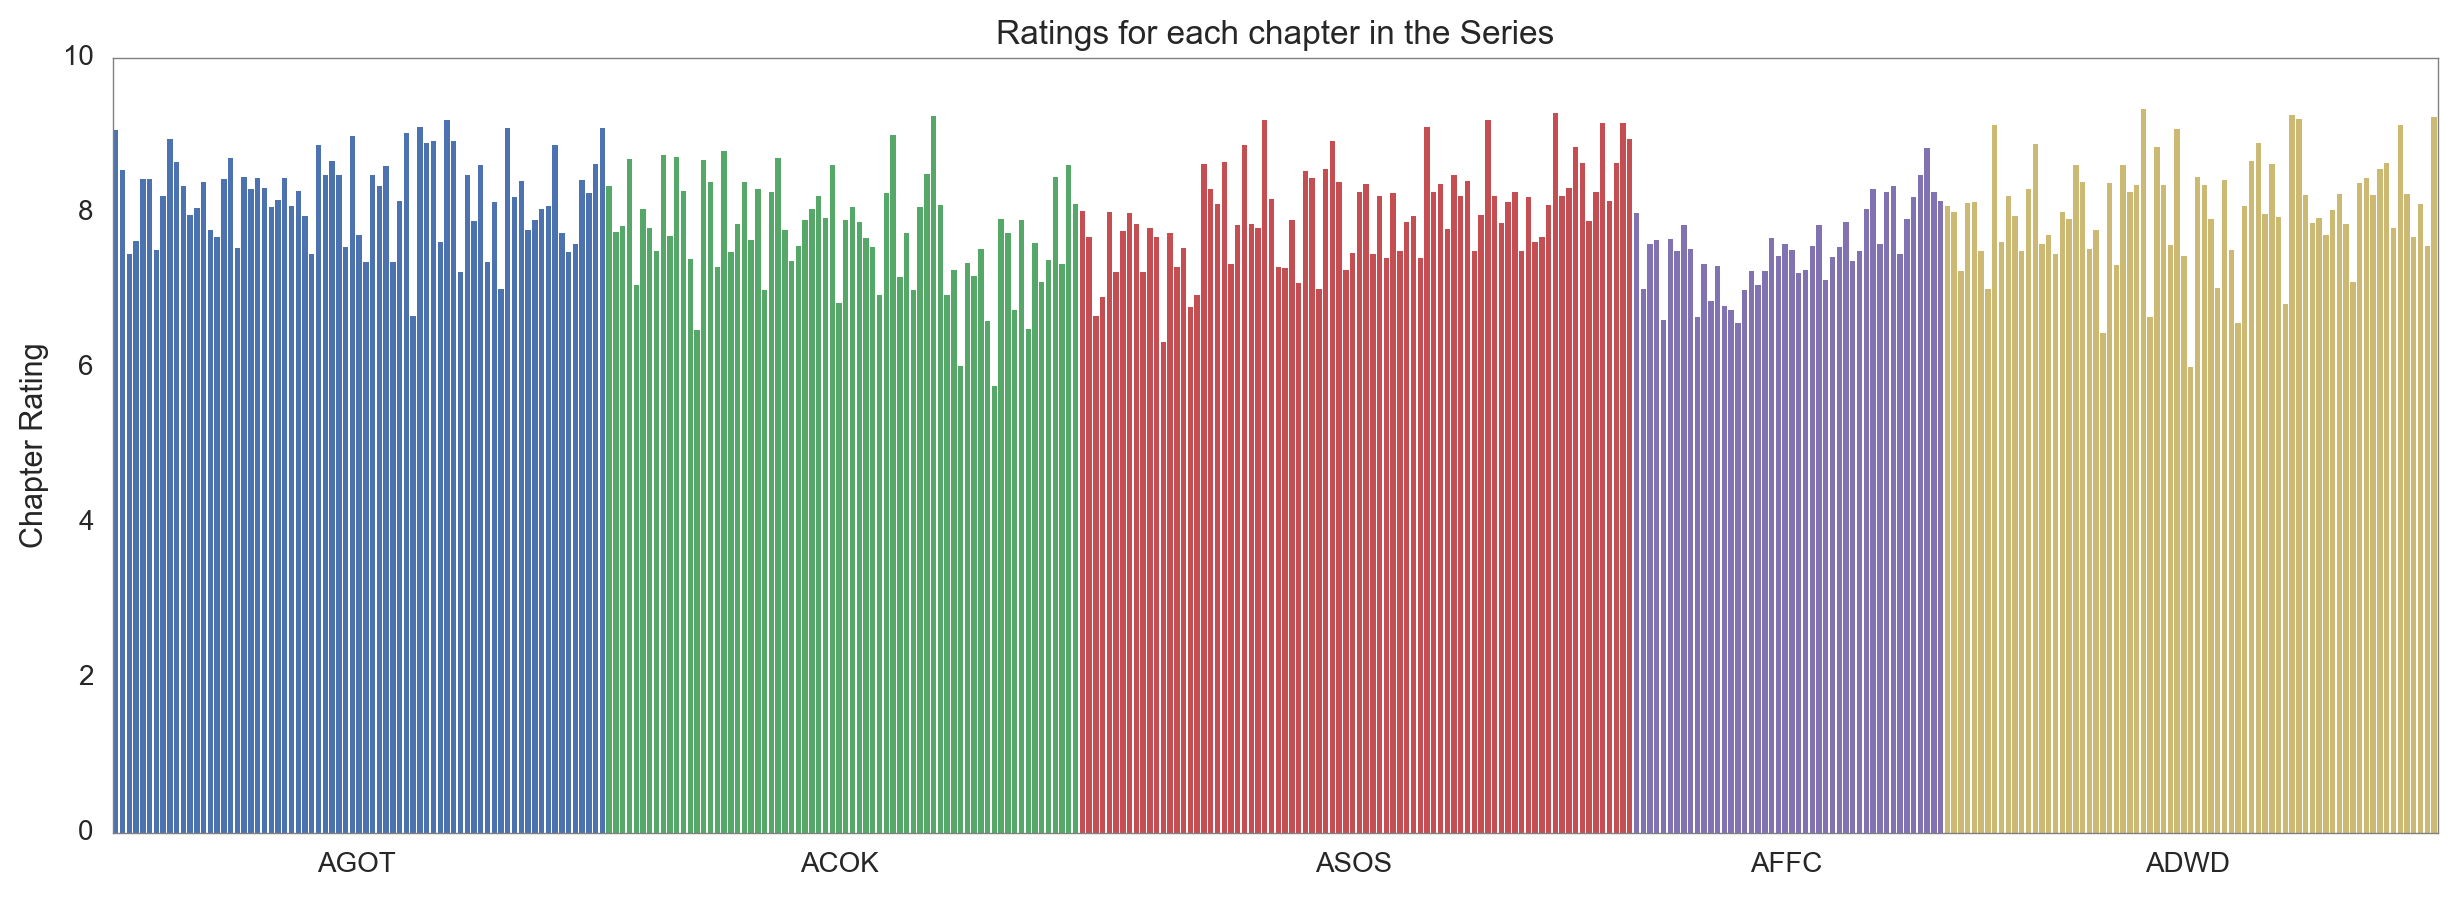

In [54]:
palette = sns.color_palette()
bar_colours = [palette[n] for n in chapter_df.bookID]

plt.bar(chapter_df.index, chapter_df.ChapterRating, color=bar_colours, alpha=1.0, lw=0)

plt.xlim(0,len(chapter_df))
plt.ylim(0,10)
plt.xticks(map(lambda x: np.average(x.index), [AGOT, ACOK, ASOS, AFFC, ADWD]),["AGOT", "ACOK", "ASOS", "AFFC", "ADWD"])
plt.title('Ratings for each chapter in the Series')
#plt.xlabel('Chapter')
plt.ylabel('Chapter Rating')

plt.gcf().set_size_inches(15,5)
plt.savefig("ASOIAF_-_all_books_-_chapter_ratings.png", dpi=148)

# Chapter ratings - by book

Bbox([[0.125, 0.125], [0.9, 0.9]])

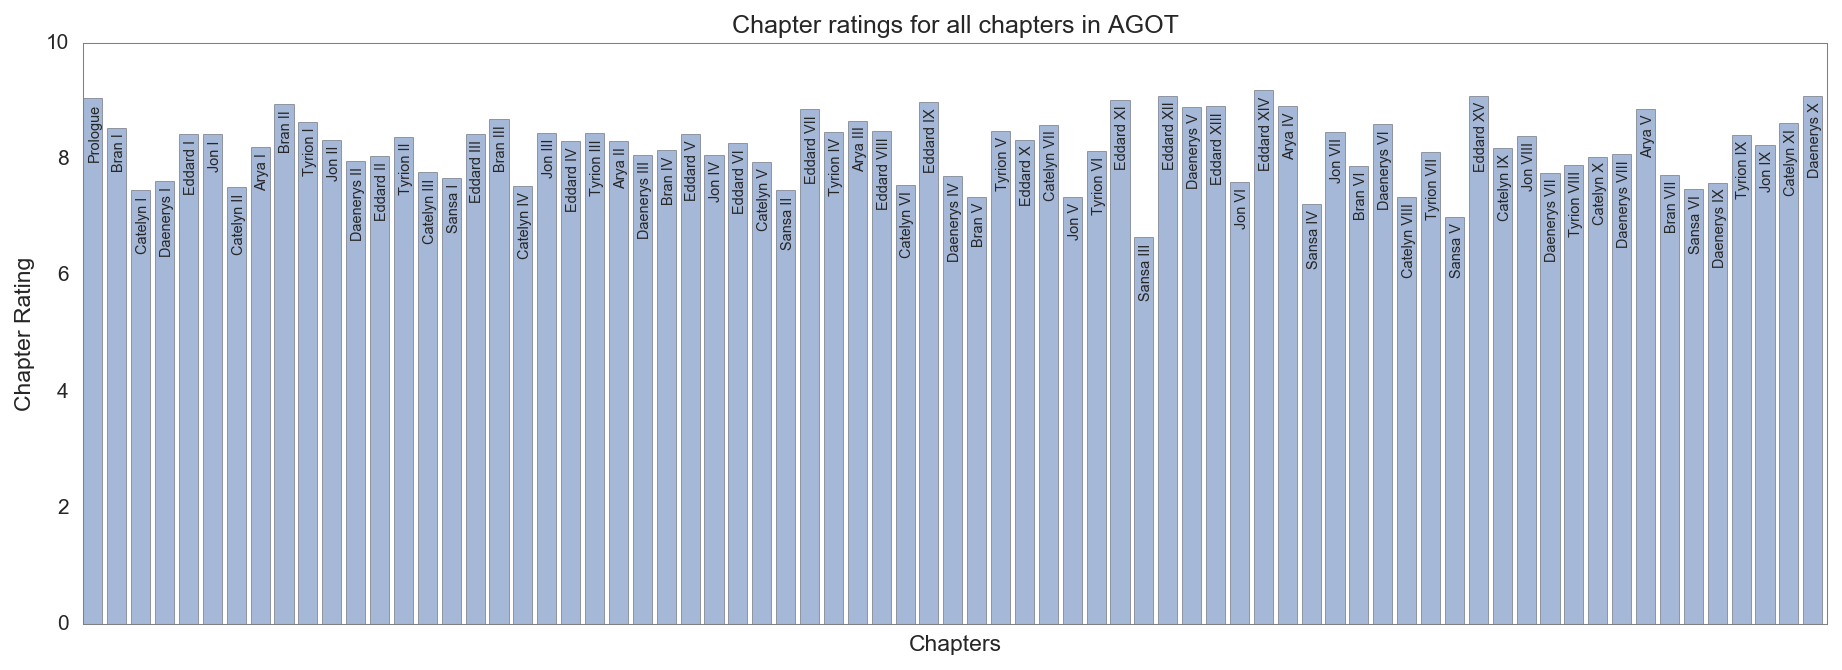

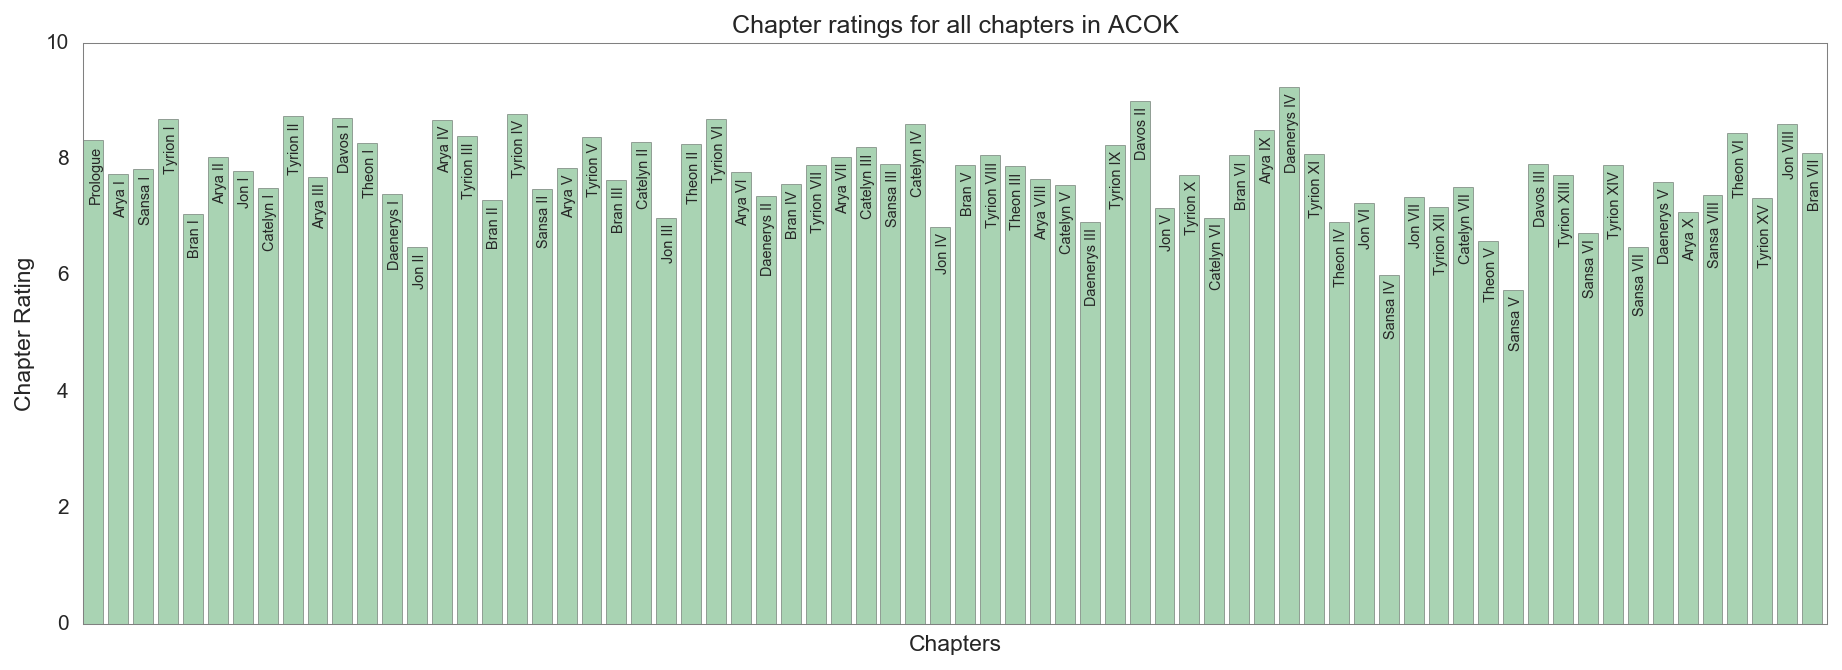

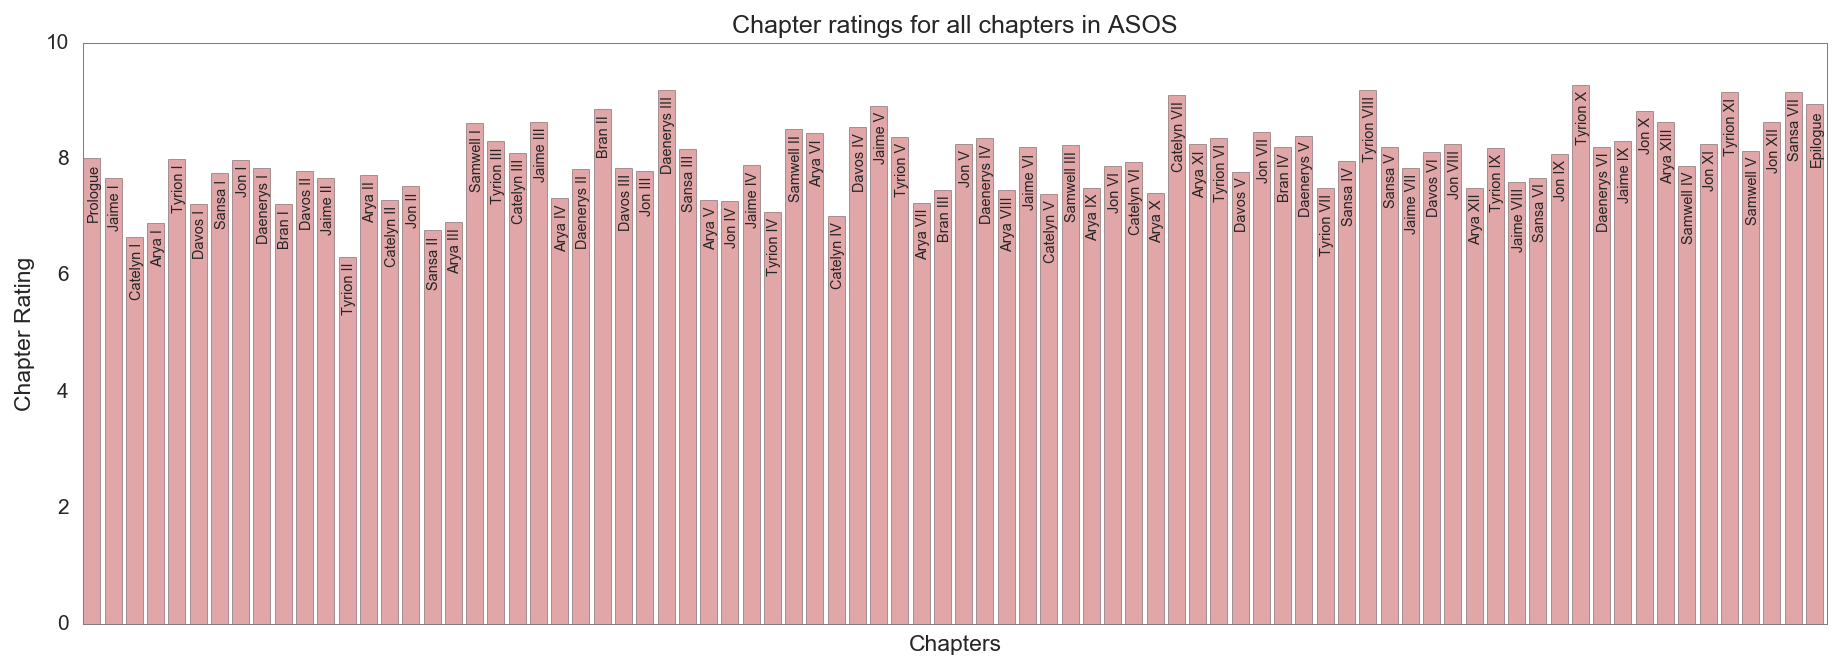

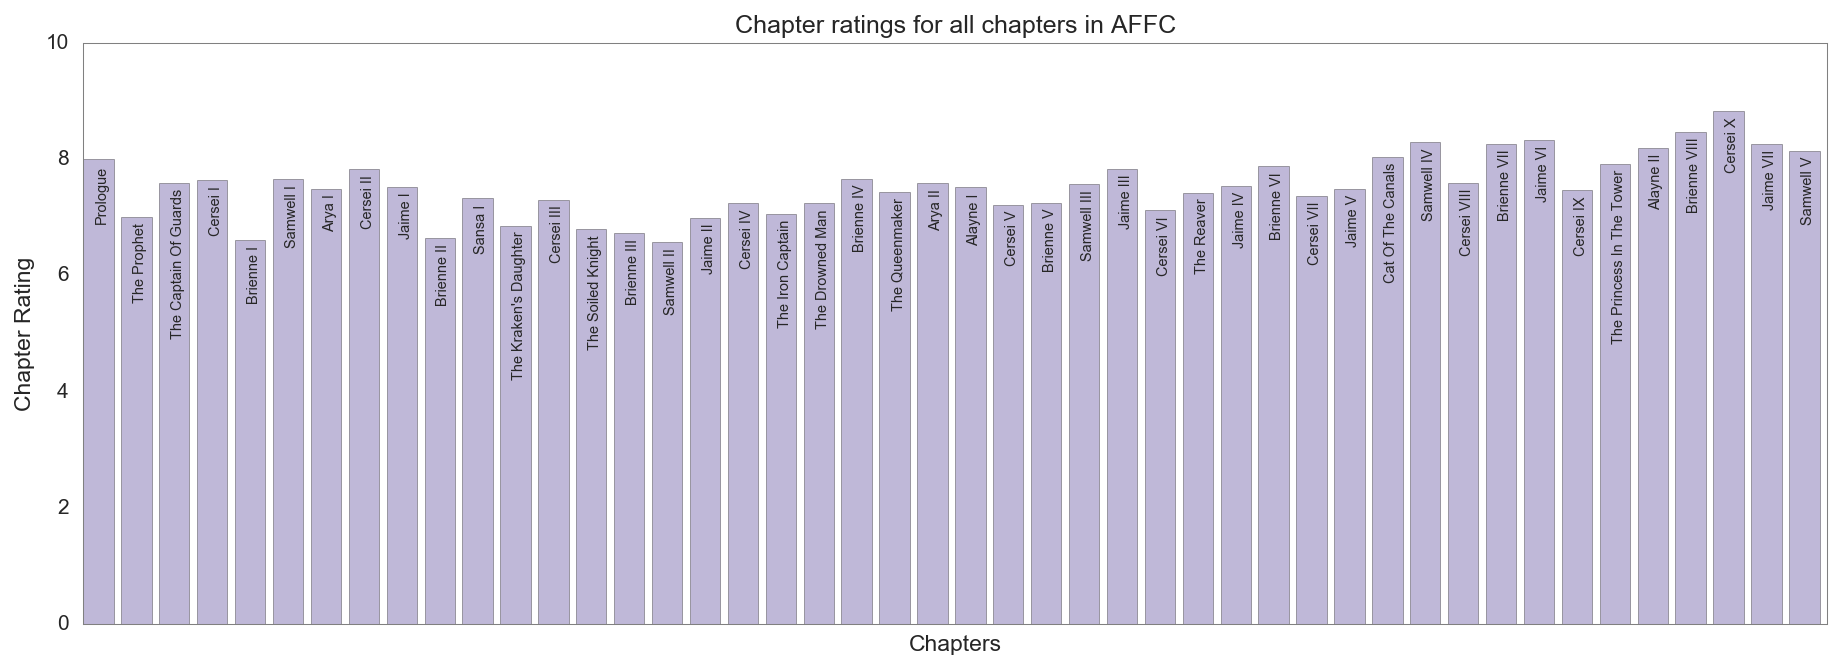

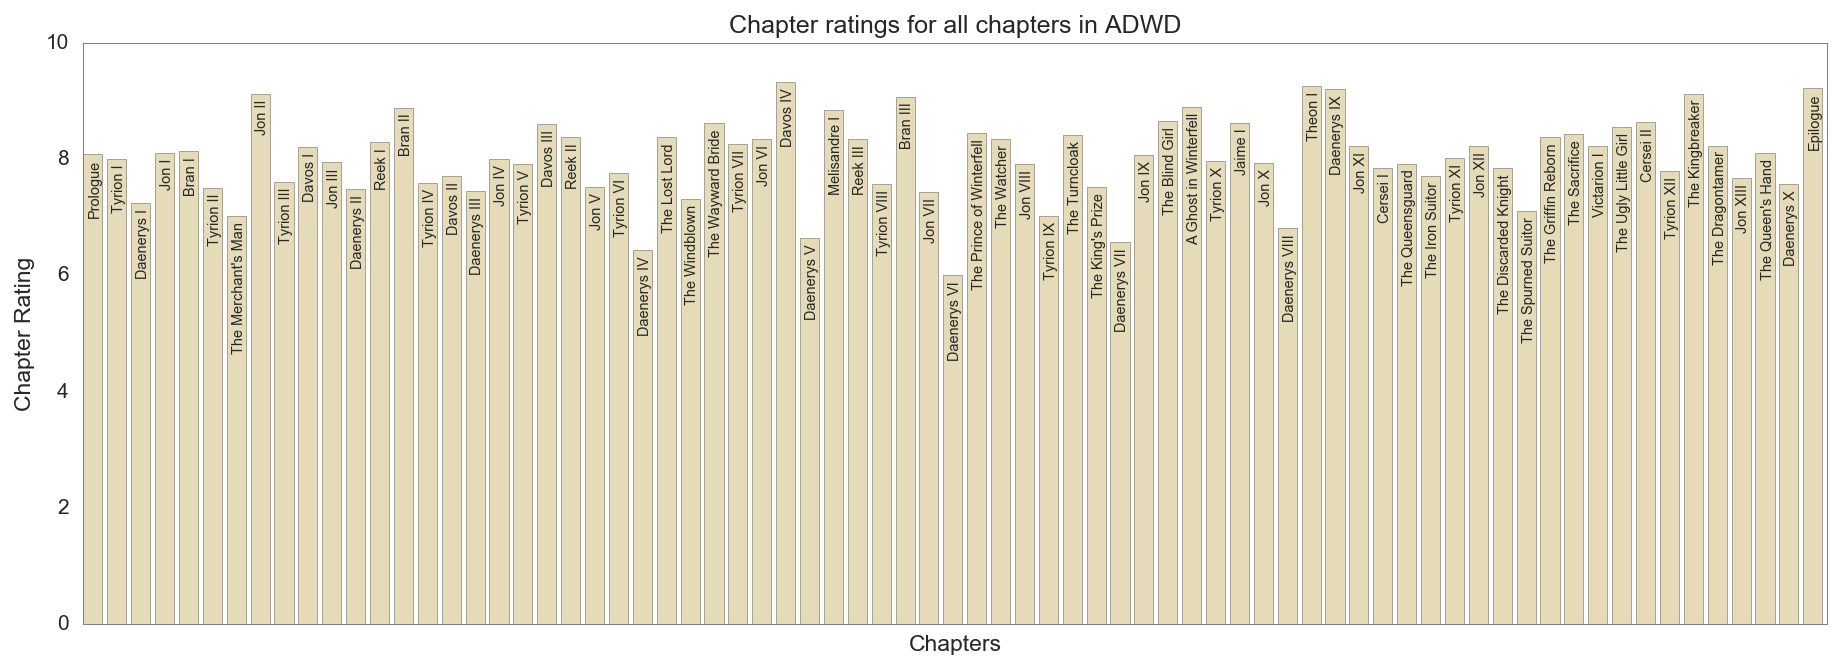

In [125]:
for book, title, colour in zip(books, ["AGOT", "ACOK", "ASOS", "AFFC", "ADWD"], palette):

    plt.figure()
    plt.bar(book['chapterInBook'], book.ChapterRating, color=colour, alpha=0.5)
    for n, chapter in book.iterrows():
        plt.text(chapter['chapterInBook']+.5, chapter['ChapterRating']-0.1, chapter['title'], size='x-small', va='top', ha='center', rotation='vertical')

    plt.xlim(0,len(book))
    plt.ylim(0,10)
    plt.title('Chapter ratings for all chapters in {}'.format(title))
    plt.xlabel("Chapters")
    plt.ylabel("Chapter Rating")
    plt.xticks([])

    plt.gcf().set_size_inches(15,5)
    #plt.gcf().savefig("ASOIAF_-_{}_-_chapter_ratings.png".format(title), dpi=150)
plt.gca().get_position()

# Chapter rating distribution - by book

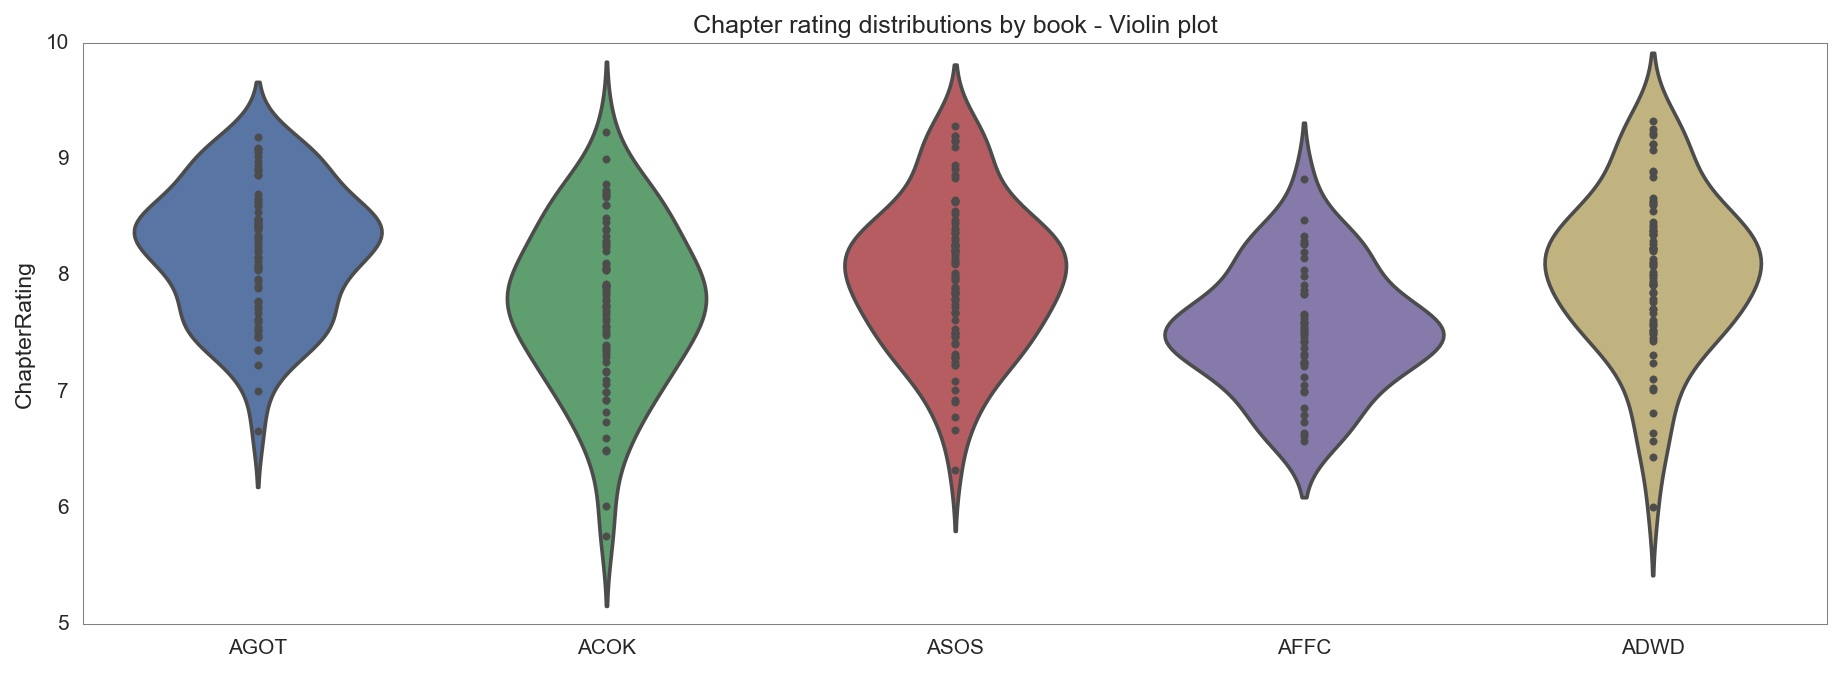

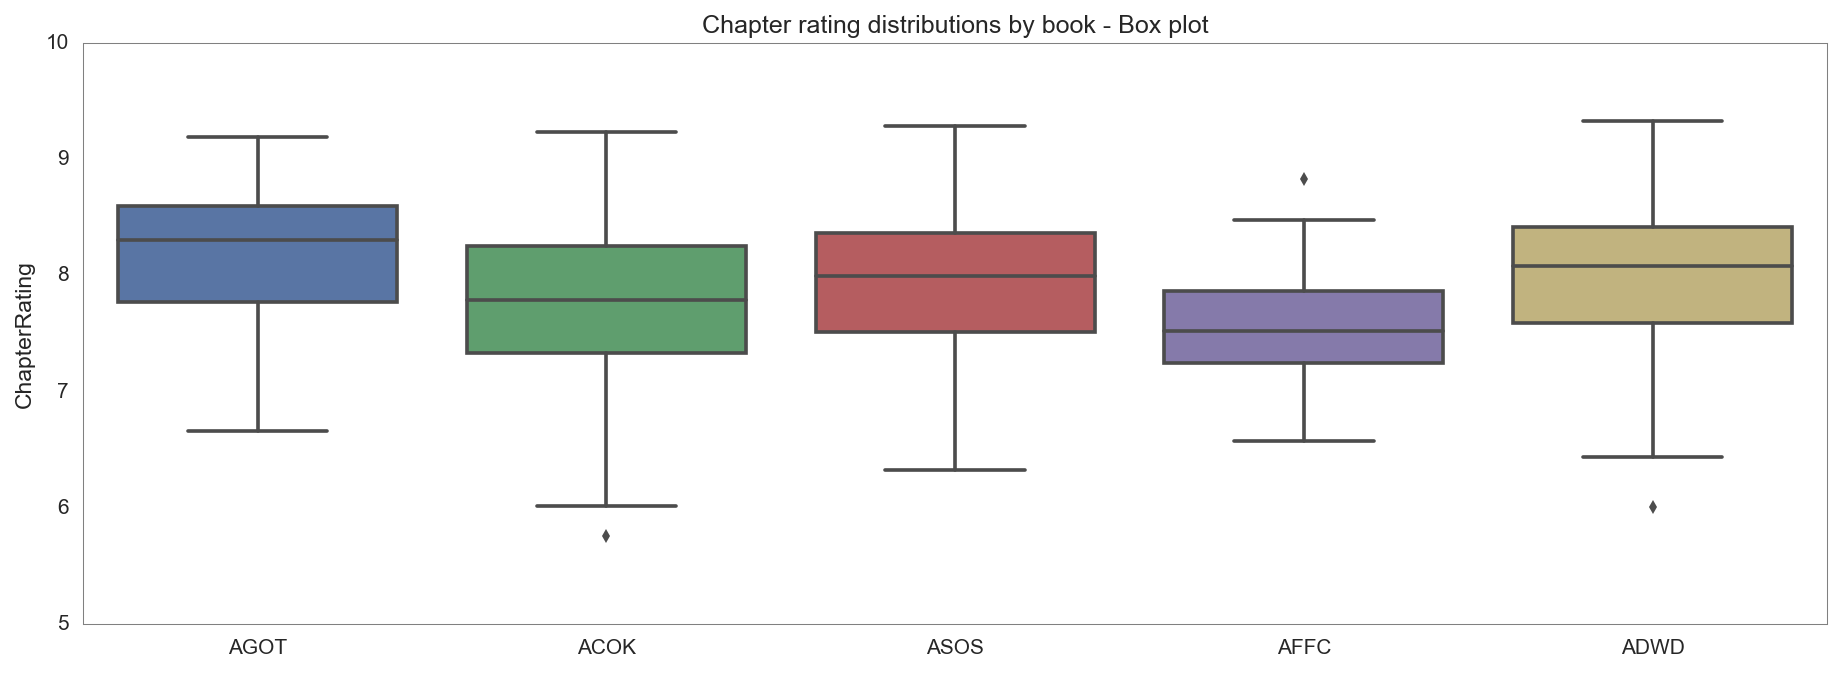

In [83]:
# Violin plot
plt.figure()
sns.violinplot(chapter_df['bookID'], chapter_df['ChapterRating'], inner='points')
plt.xticks(range(5),["AGOT", "ACOK", "ASOS", "AFFC", "ADWD"])
plt.title('Chapter rating distributions by book - Violin plot')
plt.xlabel('')
plt.ylim(5,10)
plt.gcf().set_size_inches(15,5)
plt.gcf().savefig('Chapter_rating_distributions_by_book_-_violin.png', dpi=150)

#Box plot
plt.figure()
sns.boxplot(chapter_df['bookID'], chapter_df['ChapterRating'])
plt.xticks(range(5),["AGOT", "ACOK", "ASOS", "AFFC", "ADWD"])
plt.title('Chapter rating distributions by book - Box plot')
plt.xlabel('')
plt.ylim(5,10)
plt.gcf().set_size_inches(15,5)
plt.gcf().savefig('Chapter_rating_distributions_by_book_-_box.png', dpi=150)

In [151]:
# Mean and std by book
chapter_df.groupby('bookID').ChapterRating.agg(['mean', 'std'])

,mean,std
bookID,,
0,8.212603,0.562781
1,7.750429,0.702376
2,7.994756,0.634635
3,7.545435,0.522484
4,8.029589,0.692492


# Chapter rating distribution - by POV Character

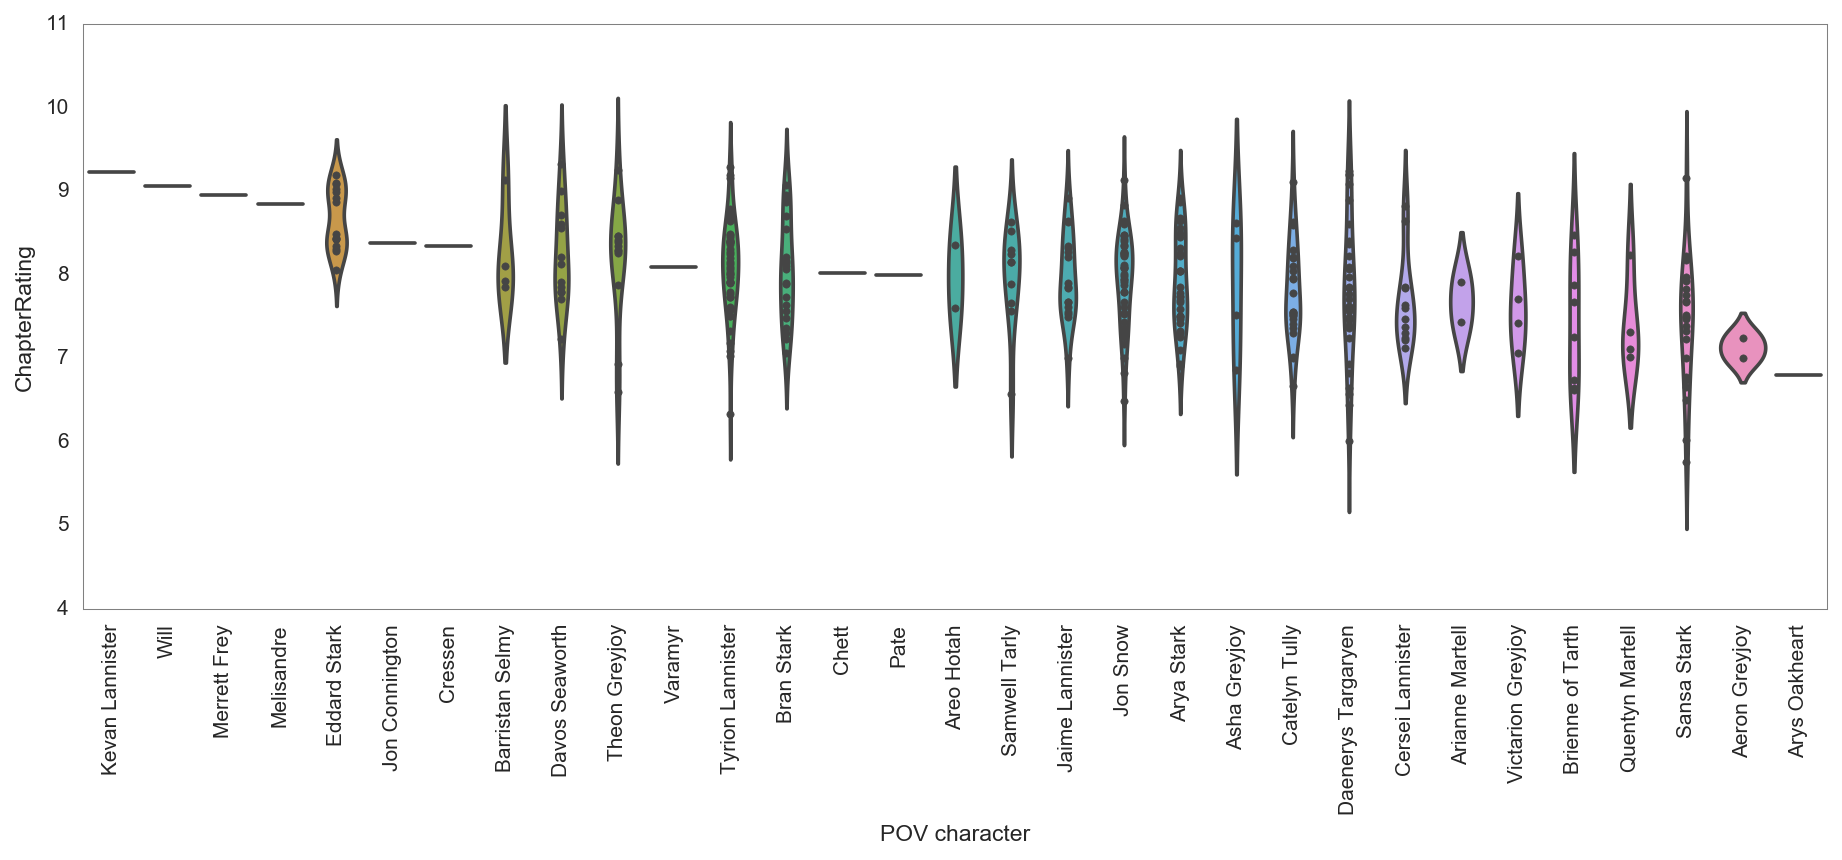

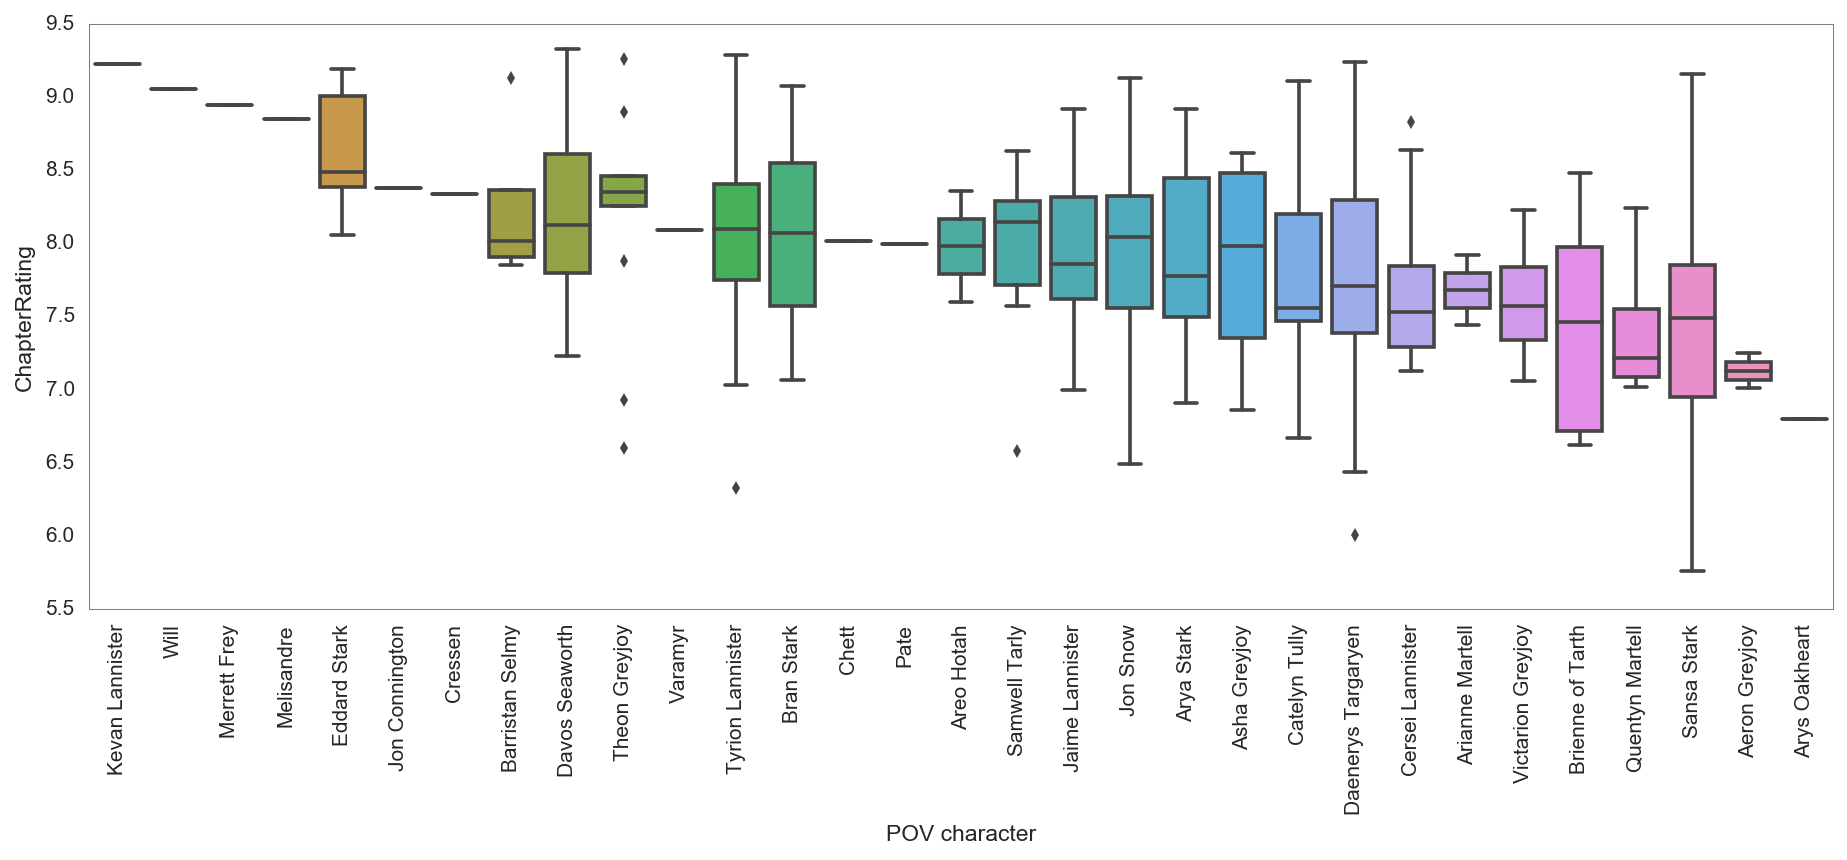

In [140]:
order = chapter_df.groupby('povID').mean().ChapterRating.sort_values(ascending=False).reset_index().povID.map(character_df.Name)

# Violin plot
plt.figure()
sns.violinplot(chapter_df['povID'].map(character_df['Name']), chapter_df['ChapterRating'], inner='points', order=order)
plt.xticks(rotation='vertical')
plt.xlabel("POV character")
plt.gcf().set_size_inches(15,6.5)
plt.gca().set_position([.125,.3,.775,.6])
plt.gcf().savefig("Chapter_rating_distributions_by_POV_character_-_violin.png", dpi=150)

# Box plot
plt.figure()
sns.boxplot(chapter_df['povID'].map(character_df['Name']), chapter_df['ChapterRating'], order=order)
plt.xticks(rotation='vertical')
plt.xlabel("POV character")
plt.gcf().set_size_inches(15,6.5)
plt.gca().set_position([.125,.3,.775,.6])
plt.gcf().savefig("Chapter_rating_distributions_by_POV_character_-_box.png", dpi=150)

# POV Character chapter occurance and rating map

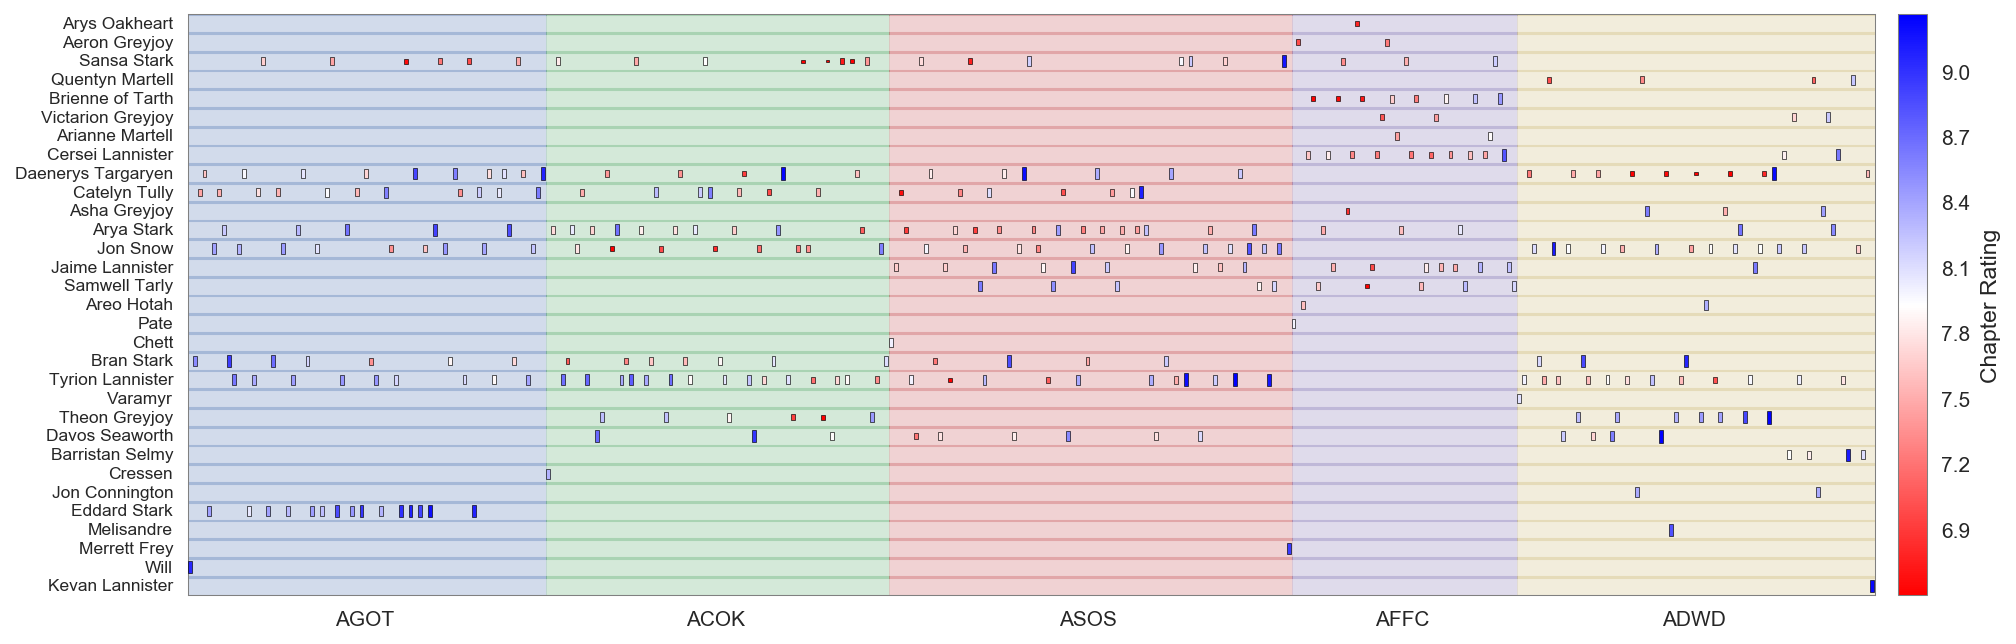

In [135]:
order = chapter_df.groupby('povID').mean().ChapterRating.sort_values(ascending=False).reset_index().povID

cmap = plt.get_cmap('RdBu')
cmap = sns.blend_palette([sns.desaturate("red", 1), "white", sns.desaturate("blue", 1)], as_cmap=True)
vmin = chapter_df.ChapterRating.mean()-2*chapter_df.ChapterRating.std()
vmax = chapter_df.ChapterRating.mean()+2*chapter_df.ChapterRating.std()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

plt.figure()
for n, characterID in enumerate(order):
    df = chapter_df[chapter_df['povID'] == characterID]
    ratings = df['ChapterRating']
    chapter_numbers = df.index
    bar_heights = (ratings-5)/6.25
    a = plt.bar(chapter_numbers, bar_heights, 
                bottom=n-(bar_heights/2), color=sm.to_rgba(ratings), zorder=3, alpha=1)  # Bar height proportional to chapter rating
    #a = plt.bar(chapter_numbers, [0.8]*len(bar_heights),
    #            bottom=n-0.4, color=cmap(bar_heights))  # Fixed bar height
for color, bookdf in zip(palette, books):
    plt.fill_between(bookdf.index.tolist()+[bookdf.index.tolist()[-1]+1],-1,32, color=color, alpha=0.5, zorder=1)
for n in range(31):
    plt.fill_betweenx([n-.4, n+.4],0,500, color="white", alpha=0.5, zorder=2)

plt.xlim(0,books[-1].index[-1]+1)
plt.xticks(map(lambda x: np.average(x.index), [AGOT, ACOK, ASOS, AFFC, ADWD]),["AGOT", "ACOK", "ASOS", "AFFC", "ADWD"])
plt.ylim(-0.5,30.5)
plt.yticks(range(len(order)), [x for x in character_df.loc[order]['Name']], size='small')
plt.grid(False)

cb = plt.colorbar(sm)
cb.set_label("Chapter Rating")

plt.gcf().set_size_inches(15,5)
plt.gca().get_position()
plt.gca().set_position([.125,.125,.75,.775])
cb.ax.set_position([.885,.125,.55,.775])
plt.gcf().savefig("Chapter_ratings_by_POV_character_-_all_books.png", dpi=300)

# Character mention map

C:\Users\Danny\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


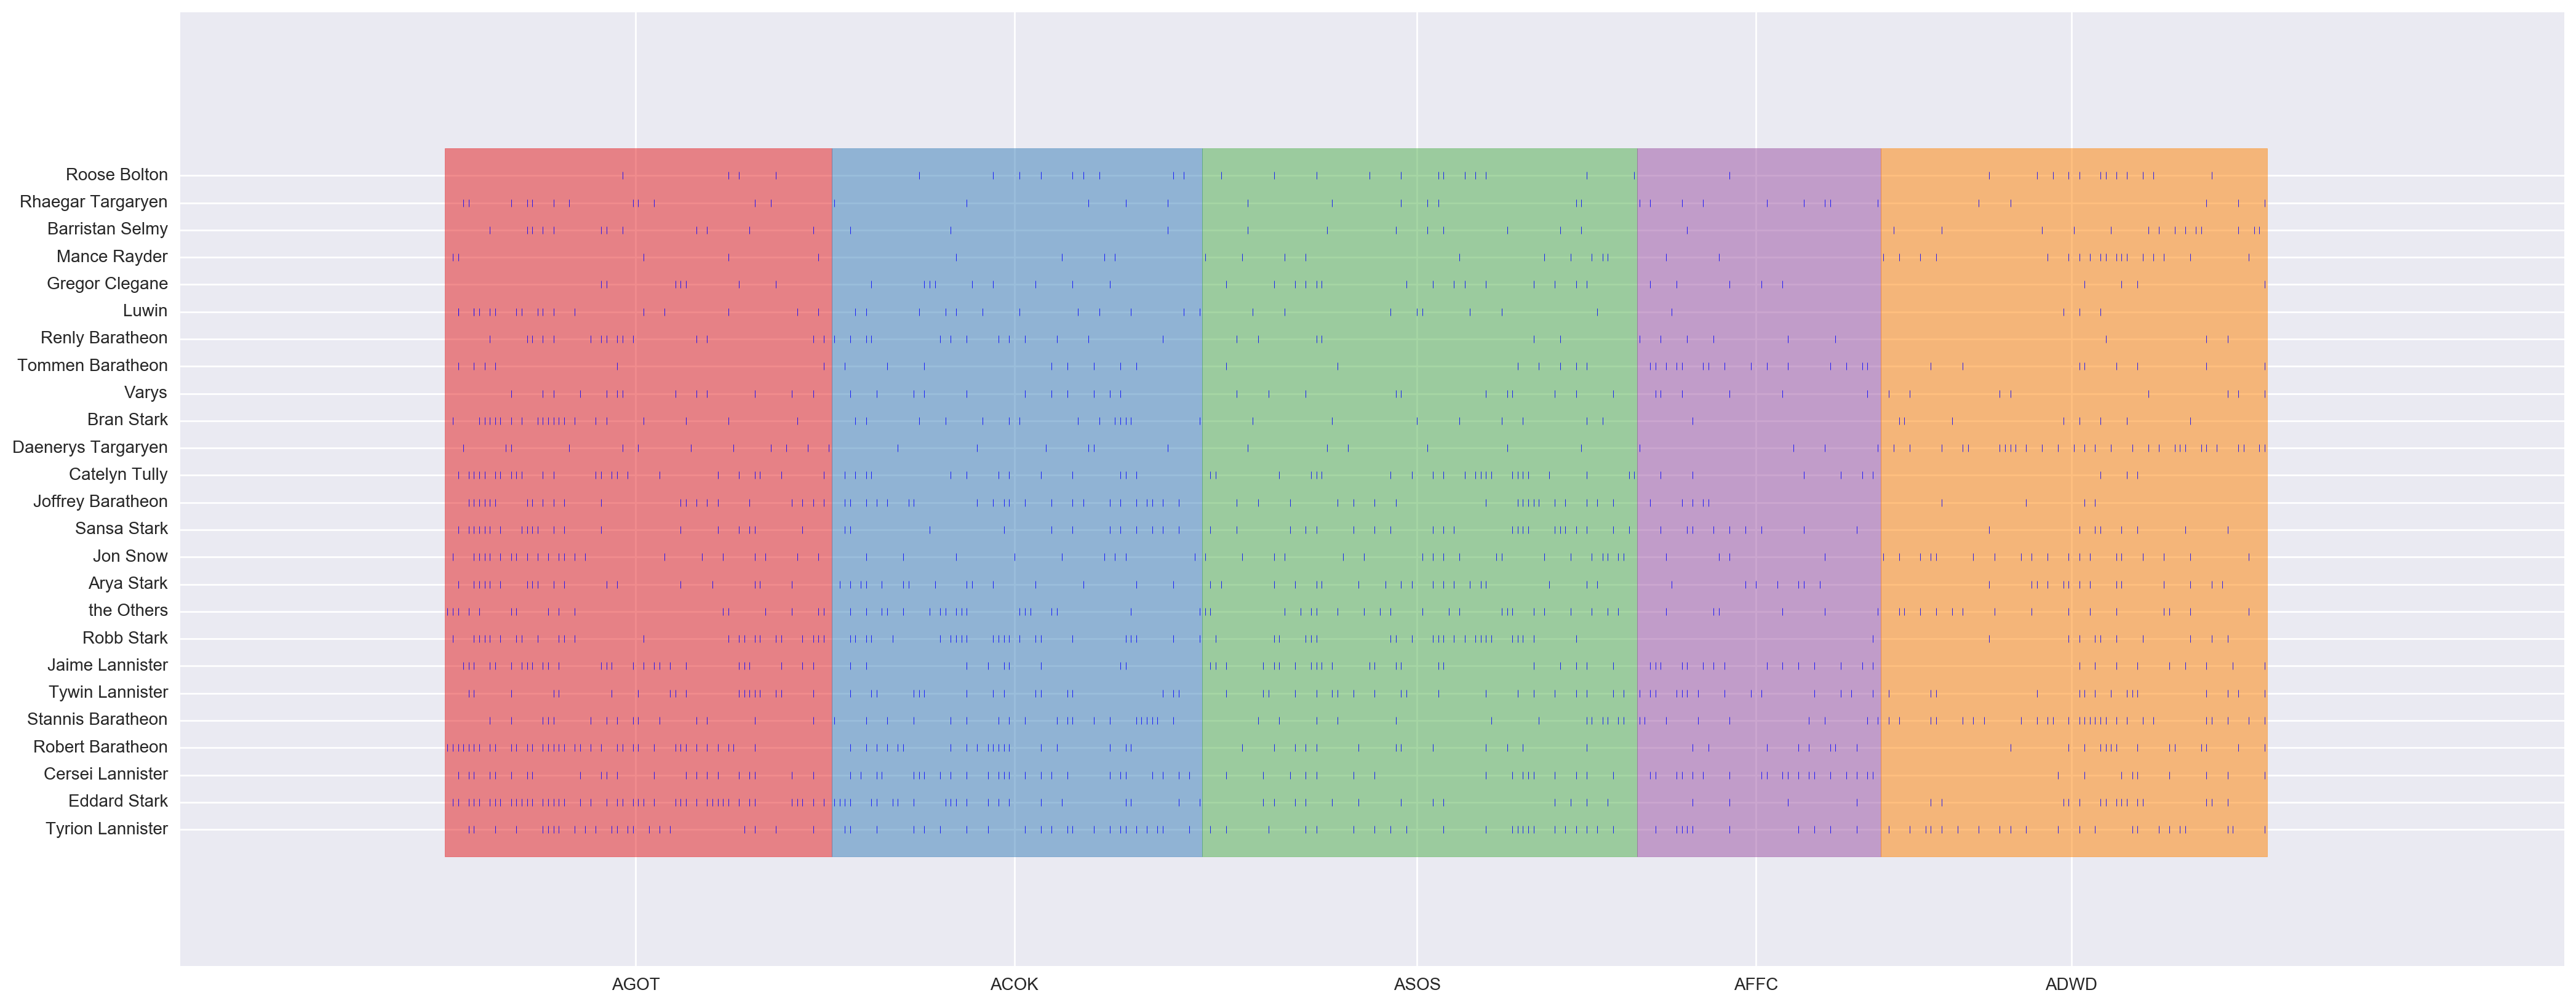

In [14]:
mentions_df = event_df[event_df['event'] == 'mentioned']
appearance_count = mentions_df.groupby('characterID').size()
appearance_count.sort(ascending=False)
character_df.loc[appearance_count.index]['Name']
character_mentions_df = pd.DataFrame([character_df.loc[appearance_count.index]['Name'],appearance_count]).T

number_of_characters = 25

appearance_dict = {}
for characterID in appearance_count.index:
    appearance_dict[characterID] = mentions_df[mentions_df['characterID'] == characterID].index

plt.figure()
for n, characterID in enumerate(appearance_count.index[:number_of_characters]):
    plt.scatter(appearance_dict[characterID]+0.5,[n]*len(appearance_dict[characterID]), marker='|', s=20, zorder=10)
for color, bookdf in zip(palette, books):
    plt.fill_between(bookdf.index.tolist()+[bookdf.index.tolist()[-1]+1],-1,number_of_characters, color=color, alpha=0.5, zorder=1)

plt.yticks(range(len(appearance_count.index[:number_of_characters])), [x for x in character_df.loc[appearance_count.index][:number_of_characters]['Name']])
plt.xticks(map(lambda x: np.average(x.index), [AGOT, ACOK, ASOS, AFFC, ADWD]),["AGOT", "ACOK", "ASOS", "AFFC", "ADWD"])

plt.gcf().set_size_inches(25,10)

## To Do:

+ Add information to the chapter csv file like location, chapter length (any combination of number of pages, number of words, duration of chapter in audiobook), 
+ Get some approximation for chapter length and set the width of the chapter rating bars equal to chapter length.
+ Scatter plot between chapter length and ratings
+ Scrape awoiaf and tower of the hand for character appearances by chapter
+ Generate character appearance/mention correlation matrix from character appearance map or character mention map
+ Visualise character appearance/mention correlation matrix as network (colour by cluster. Cluster by community decection (http://perso.crans.org/aynaud/communities/) or 'Team' in character_df)

In [10]:
index = mentions_df.index.unique()
columns = mentions_df.characterID.unique()
character_mention_df = pd.DataFrame(index=index, columns=columns)
character_mention_df = character_mention_df.fillna(0)
for characterID,chapterID in mentions_df.characterID.iteritems():
    character_mention_df.loc[characterID,chapterID] = 1

<matplotlib.colorbar.Colorbar instance at 0x0EA03620>

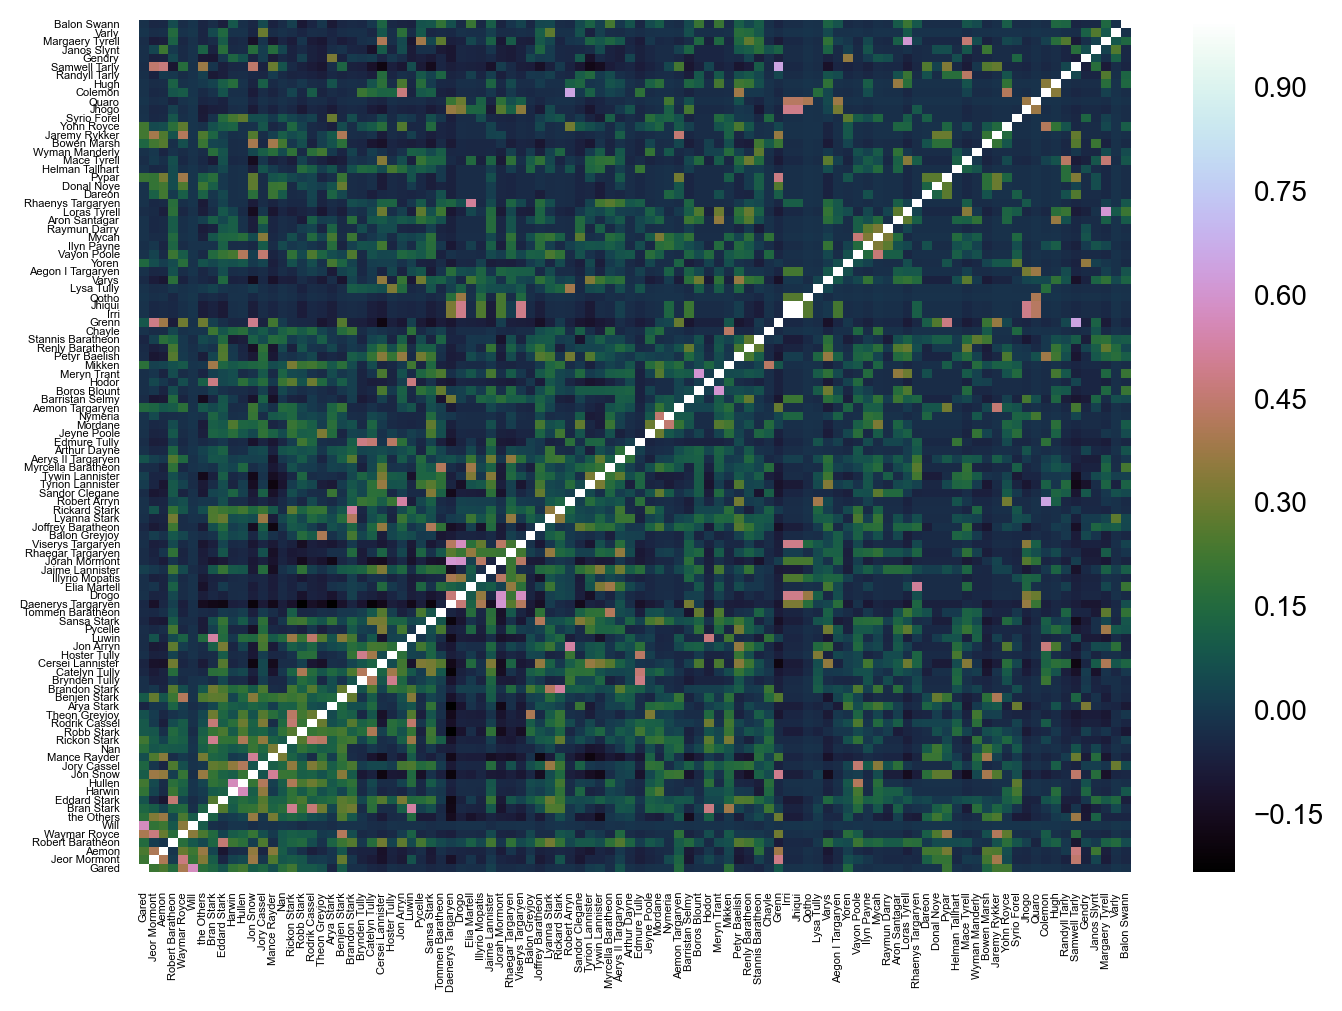

In [11]:
rcParams['savefig.dpi'] = 200
corr_matrix_size = 100  # How many characters to consider in the correaltion matrix
plt.pcolor(character_mention_df.iloc[:,:corr_matrix_size].corr())
plt.xticks(np.arange(0.5,0.5+corr_matrix_size),[character_df.loc[characterID]['Name'] for characterID in character_mention_df.iloc[:,:corr_matrix_size].columns], rotation='vertical', size=4, ha='center')
plt.yticks(np.arange(0.5,0.5+corr_matrix_size),[character_df.loc[characterID]['Name'] for characterID in character_mention_df.iloc[:,:corr_matrix_size].columns], rotation='horizontal', size=4, ha='right')
plt.colorbar()

In [25]:
most_frequently_ocurring_characters = character_mentions_df.index[:]
corr_matrix = character_mention_df.loc[:,most_frequently_ocurring_characters].corr()  # All_characters


import networkx as nx
import community

G = nx.Graph()

for ch1ID,corr_series in corr_matrix.iteritems():
    for ch2ID in corr_series.index:
        corr_value = corr_series[ch2ID]
        if ch1ID != ch2ID and corr_value > 0.00:
            G.add_edge(character_df.ix[ch1ID]['Name'], character_df.ix[ch2ID]['Name'], weight= float(corr_value))

community_classification = community.best_partition(G)

for node in G.nodes(data=True):
    node[1]['Mentions'] = character_mentions_df.set_index('Name').iloc[:,0].loc[node[0]]
    node[1]['community_classifier'] = community_classification[node[0]]
    node[1]['Team'] = character_df.set_index('Name').loc[:,'Team'].loc[node[0]]
    
#pos = nx.spring_layout(G, iterations=100)
#nx.draw_spring(G, node_size=100, font_size=6)
nx.write_graphml(G, 'GoT_network.graphml')

#Use gexf-js to render interactive graphs (https://github.com/raphv/gexf-js)

In [13]:
import json
import networkx as nx
from networkx.readwrite import json_graph
import http_server


#G = nx.barbell_graph(6,3)
# this d3 example uses the name attribute for the mouse-hover value,
# so add a name to each node
for n in G:
    G.node[n]['name'] = n
# write json formatted data
d = json_graph.node_link_data(G) # node-link format to serialize
# write json
json.dump(d, open('force/force.json','w'))
print('Wrote node-link JSON data to force/force.json')
# open URL in running web browser
http_server.load_url('force/force.html')
print('Or copy all files in force/ to webserver and load force/force.html')

Wrote node-link JSON data to force/force.json
Press <RETURN> to stop server

To restart server run: 
python -m SimpleHTTPServer 8000
Or copy all files in force/ to webserver and load force/force.html


127.0.0.1 - - [13/Mar/2014 15:01:13] "GET /force/force.json HTTP/1.1" 200 -


In [17]:
#Clean up the dataframe handling.

#chapter_df = pd.DataFrame.from_csv("chapters_with_ratings.csv")
#character_df = pd.DataFrame.from_csv("characters.csv", index_col=None, parse_dates=False).set_index('Name', drop=False)
#event_df = pd.DataFrame.from_csv("events.csv")

#event_df['CharacterName'] = ((character_df.set_index('characterID').loc[event_df['characterID']])['Name']).tolist()
#chapter_df['povName'] = ((character_df.set_index('characterID').loc[chapter_df['povID']])['Name']).tolist()
# Add column for number of mentions to character_df
# Sort character_df by number of mentions

#books_str = ["AGOT", "ACOK", "ASOS", "AFFC", "ADWD"]


#POV_df = pd.DataFrame(chapter_df.groupby(chapter_df.povID).size(), columns=['number_of_chapters'])
#POV_df['NumOfAppearancesRank'] = POV_df['number_of_chapters'].rank('first')
#character_positions_map = POV_df['NumOfAppearancesRank'].astype(int)

In [24]:
node

('Randyll Tarly', {'Mentions': 15L, 'name': 'Randyll Tarly'})